<a href="https://colab.research.google.com/github/sinayavarian/Math-for-AI/blob/main/Lab_Exercise_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Geometric and intensity transformations

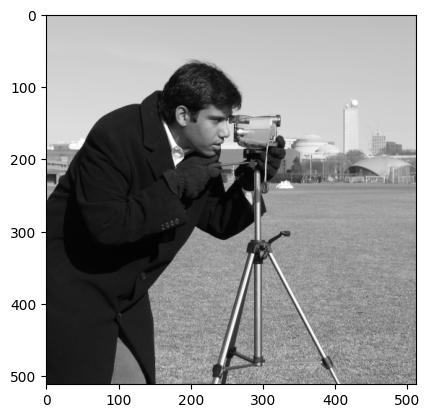

In [14]:
import scipy as sc
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
#install skimage: pip install scikit-image
import skimage
from skimage import data, transform


f = data.camera()
  # retrieve a grayscale image
imshow(f, cmap=plt.cm.gray)

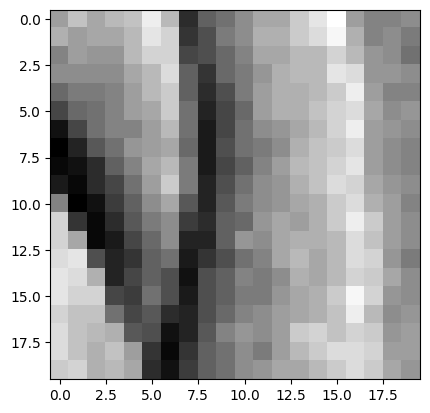

In [3]:
# Explore intensity variations
imshow(f[220:240, 110:130], cmap=plt.cm.gray, interpolation='nearest')

In [4]:
## Geometric transformations
lx, ly = f.shape
# Cropping
crop_f = f[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_f = np.flipud(f)
# rotation
rotate_f = ndimage.rotate(f, 45)
rotate_f_noreshape = ndimage.rotate(f, 45, reshape=False)

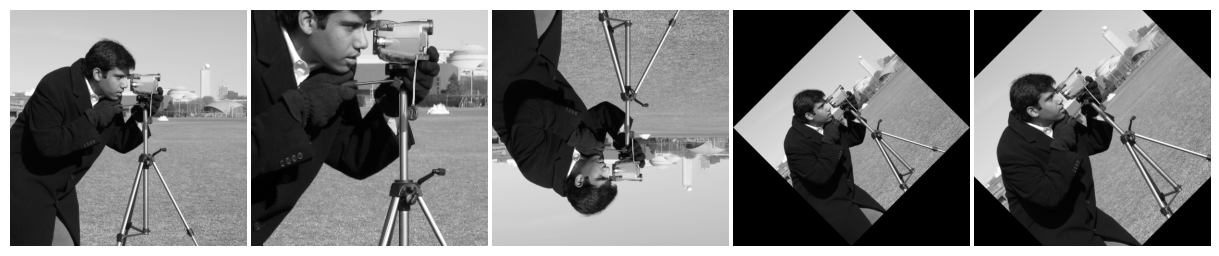

In [5]:

plt.figure(figsize=(12, 3))
plt.subplot(151)
imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
imshow(crop_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
imshow(flip_ud_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
imshow(rotate_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
imshow(rotate_f_noreshape, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()

### Translation

Text(0.5, 1.0, 'Translated image')

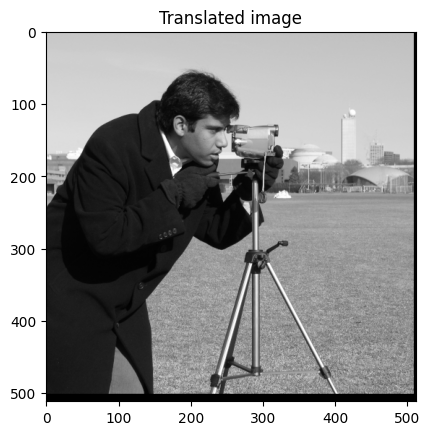

In [6]:
# Recall the shape of the transformation matrix
#[[a0  a1  a2]
# [b0  b1  b2]
# [0   0    1]]
# Lets translate by dx=3 and dy=10 pixels
transl=np.array([[1,0,3],[0,1,10],[0,0,1]])
transl=transl.reshape((3,3))
imshow(transl, cmap='gray')

tf=transform.AffineTransform(matrix=transl, scale=None, rotation=None, shear=None, translation=None)
transl=transform.warp(f, tf, order =1, preserve_range=True, mode='constant')
imshow(transl, cmap='gray')
plt.title("Translated image")

### Shear

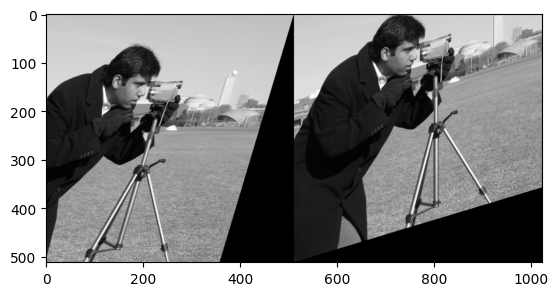

In [7]:
# horizontal
f=f/255.0 # scale to the pixel intensity range (0,1)
shear1=np.array([[1, 0.3 , 0.0],[0, 1, 0],[0,0,1]])
tf_h=transform.AffineTransform(matrix=shear1, scale=None, rotation=None, shear=None, translation=None)
im1=transform.warp(f, tf_h, order =1, preserve_range=True, mode='constant')
# vertical
shear2=np.array([[1, 0.0 , 0.0],[0.3, 1, 0],[0,0,1]])
tf_v=transform.AffineTransform(matrix=shear2, scale=None, rotation=None, shear=None, translation=None)
im2=transform.warp(f, tf_v, order =1, preserve_range=True, mode='constant')

plt.figure()
imshow(np.hstack([im1,im2]), cmap='gray')

In [8]:
tf_v

<AffineTransform(matrix=
    [[1. , 0. , 0. ],
     [0.3, 1. , 0. ],
     [0. , 0. , 1. ]]) at 0x7bbee9858e30>

### Rescaling

In [9]:
f_rescaled=transform.rescale(f, 0.5, anti_aliasing=False)

Text(0.5, 1.0, 'Rescaled image by 50%')

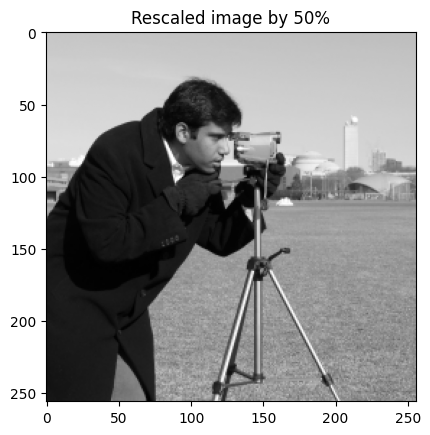

In [10]:
imshow(f_rescaled, cmap='gray')
plt.title("Rescaled image by 50%")

### Resizing

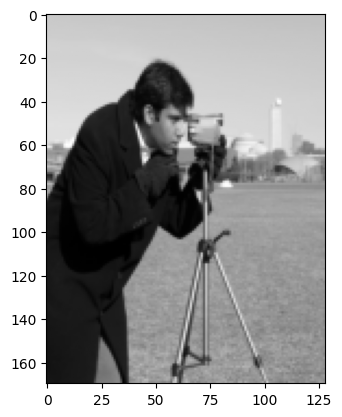

In [11]:
f_resized=transform.resize(f, (int(f.shape[0]/3), f.shape[1]/4), anti_aliasing=True)
imshow(f_resized, cmap='gray')

In [12]:
np.shape(f_resized)

(170, 128)

### Rotation with transform.rotate

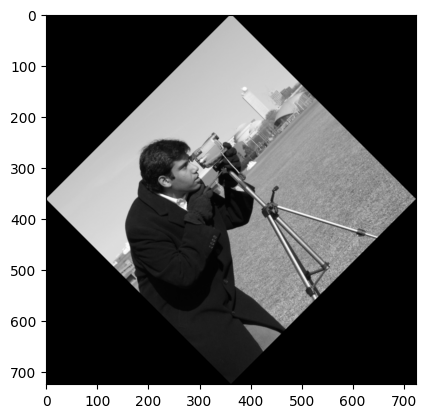

In [13]:
import math

tf=transform.rotate(f, 45, resize=True, mode='constant')
im=tf*255
imshow(im, cmap='gray')


### Question 1:
#### 1.  Using Python skimage.transform functions considered above, perform a horizontal shear by 0.2 and image rescaling by 50% on 'ascent' image (referred to as f).Display the final result.
#### 2. Define a translation matrix for shifting an image by 5 pixels in x-direction and by 10 pixels in y-direction, and apply AffineTransform to translate the image (f=ascent). Display the final result.
#### 3. Start with ascent image (f). Perform a consequent series of operations on an image f, rotate  an image by -45 degrees, then rescale the rotated image by 1.2 and crop it to the 50% of its central part.  


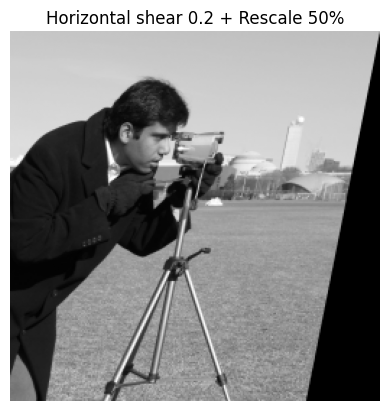

In [15]:
# Leave your answer here
shear = np.array([[1, 0.2, 0],
                  [0, 1, 0],
                  [0, 0, 1]])

tf_h = transform.AffineTransform(matrix=shear)
sheared = transform.warp(f, tf_h, order=1, preserve_range=True, mode='constant')

final_img = transform.rescale(sheared, 0.5, anti_aliasing=False, preserve_range=True)

plt.imshow(final_img, cmap='gray')
plt.title("Horizontal shear 0.2 + Rescale 50%")
plt.axis('off')
plt.show()

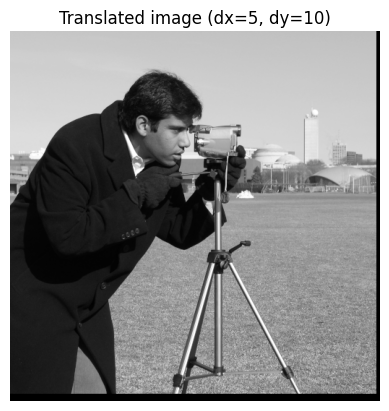

In [18]:
dx, dy = 5, 10
transl = np.array([[1, 0, dx],
                   [0, 1, dy],
                   [0, 0, 1]])

tf = transform.AffineTransform(matrix=transl)
translated = transform.warp(f, tf, order=1, preserve_range=True, mode='constant')

plt.imshow(translated, cmap='gray')
plt.title("Translated image (dx=5, dy=10)")
plt.axis('off')
plt.show()

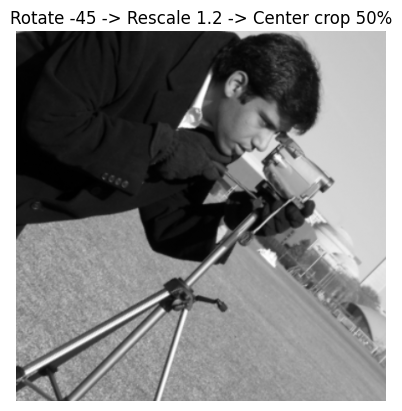

In [19]:
rot = transform.rotate(f, -45, resize=True, mode='constant')

scaled = transform.rescale(rot, 1.2, preserve_range=True, anti_aliasing=True)

h, w = scaled.shape
h1, h2 = h//4, 3*h//4
w1, w2 = w//4, 3*w//4
cropped = scaled[h1:h2, w1:w2]

plt.imshow(cropped, cmap='gray')
plt.title("Rotate -45 -> Rescale 1.2 -> Center crop 50%")
plt.axis('off')
plt.show()


### Gamma correction and log contrast adjustment

Text(0.5, 0, 'Pixel intensity')

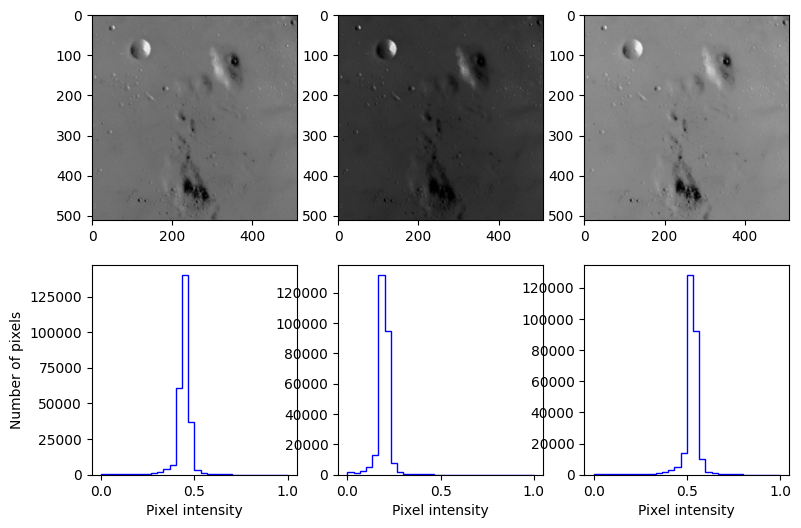

In [21]:
from skimage import data, img_as_float
from skimage import exposure

# Load a low-contrast image
im = data.moon()
im= img_as_float(im)

fig=plt.figure(figsize=(9,6))
axes=np.zeros((2,3), dtype=object)
axes[0,0]=plt.subplot(2,3,1)
axes[0,1]=plt.subplot(2,3,2)
axes[0,2]=plt.subplot(2,3,3)

axes[1,0]=plt.subplot(2,3,4)
axes[1,1]=plt.subplot(2,3,5)
axes[1,2]=plt.subplot(2,3,6)
ax_im, ax_hist = axes

# Gamma corrected
gamma_corrected = exposure.adjust_gamma(im, 2)

# logarithmic corrected
logarithmic_corrected = exposure.adjust_log(im, 1)

#__________________________
# Display image
ax_im[0].imshow(im, cmap='gray')
#Display histogram for original image
ax_hist[0].hist(im.ravel(), bins=30, histtype='step', color='b' )
ax_hist[0].set_xlabel('Pixel intensity')
ax_hist[0].set_ylabel('Number of pixels')

ax_im[1].imshow(gamma_corrected, cmap='gray')
#Display histogram for gamma-corrected image
ax_hist[1].hist(gamma_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[1].set_xlabel('Pixel intensity')

ax_im[2].imshow(logarithmic_corrected, cmap='gray')
#Display histogram for gamma-corrected image
ax_hist[2].hist(logarithmic_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[2].set_xlabel('Pixel intensity')


### Question 2:
1. Describe the effect of Gamma-correction on the distribution of pixel intensities.

where pixel intensities are normalized to the range
[
0
,
1
]
[0,1].

When γ > 1 (e.g., γ = 2):
The image becomes darker.
Mid-range pixel intensities are pushed toward lower values, so the histogram shifts toward the left (lower intensities).

When γ < 1 (e.g., γ = 0.5):
The image becomes brighter.
Mid-range intensities increase, and the histogram shifts toward the right (higher intensities).

Thus, gamma correction redistributes pixel intensities and changes image brightness without altering spatial structure.
2. How does logarithmic transformation improve the quality of an image?
The logarithmic transformation expands low-intensity values and compresses high-intensity values.

Dark regions (low pixel values) are enhanced, revealing hidden details.

Bright regions are slightly compressed, preventing saturation.

As a result:

The dynamic range is better utilized

Contrast in dark areas improves

The histogram spreads out in the low-intensity region

This makes log correction especially useful for low-contrast or dark images.
3. Perform Gamma-transformation of the moon image with the value of  $\gamma$ < 1. What effect do you observe on pixel intensities of the original image? How is you result compared against Gamma-corrected pixel intensities obtained with $\gamma$=2?
Gamma < 1 (e.g., γ = 0.5):

The image appears brighter

Details in dark areas become more visible

Histogram shifts toward higher intensity values

Gamma = 2:

The image becomes darker

Mid-level intensities are suppressed

Histogram shifts toward lower intensity values

Therefore, gamma values less than 1 enhance darker regions, while gamma values greater than 1 emphasize darker tones and reduce brightness.


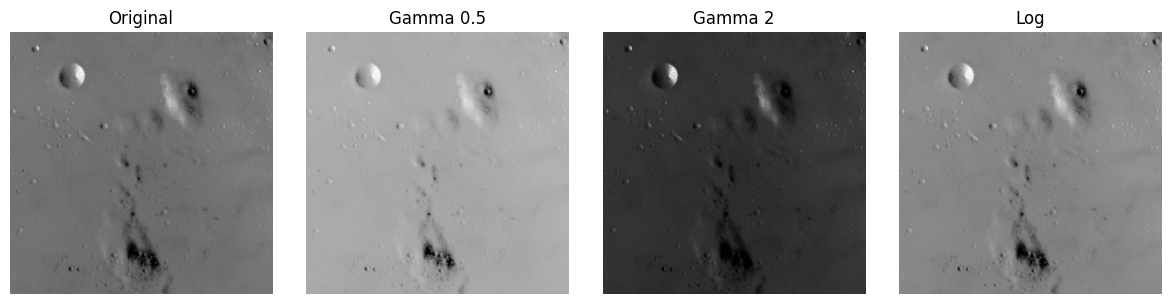

In [24]:
# Leave your answer here
import matplotlib.pyplot as plt
from skimage import data, img_as_float, exposure

plt.close('all')

im = img_as_float(data.moon())

g05 = exposure.adjust_gamma(im, 0.5)
g2  = exposure.adjust_gamma(im, 2.0)
log = exposure.adjust_log(im)

fig, axes = plt.subplots(1,4, figsize=(12,3))

axes[0].imshow(im, cmap='gray');  axes[0].set_title("Original")
axes[1].imshow(g05, cmap='gray'); axes[1].set_title("Gamma 0.5")
axes[2].imshow(g2, cmap='gray');  axes[2].set_title("Gamma 2")
axes[3].imshow(log, cmap='gray'); axes[3].set_title("Log")

for ax in axes: ax.axis('off')
plt.tight_layout()
plt.show()

